In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx
from module import MyClass, DephasingChannel, DepolarizingChannel, Results
import module.plotlib as plotlib
import seaborn as sns
plotlib.update_settings(usetex=True)

Create a color map

In [2]:
from matplotlib.colors import ListedColormap
colors = []
colors.append(mpl.colors.to_rgb('#4666FF'))
colors.append(mpl.colors.to_rgb('#FFA347'))
colors.append(mpl.colors.to_rgb('#FFE047'))
colors.append(mpl.colors.to_rgb('#9966CC'))
colors.append(mpl.colors.to_rgb('#26428B'))
colors.append(mpl.colors.to_rgb('#989898'))
colors.append(mpl.colors.to_rgb('#9BC4E2'))
newcmp = ListedColormap(colors)

Loop over all instances

In [3]:
import os
nb_path = os.path.dirname(os.path.realpath("__file__"))
os.chdir('../../data/')

In [4]:
# Calculate the cost at the output from QAOA
approxr_dephasing = []
approxr_depolarizing = []
var_dephasing = []
var_depolarizing = []

# Calculate the mitigated cost 
m_approxr_dephasing = []
m_approxr_depolarizing = []
m_var_dephasing = []
m_var_depolarizing = []

# Loop over all instances
for i in range(30):
    # Path to data
    path = 'max_cut_' + str(i) + '/'

    # Create result object
    res = Results(path)

    # Append results
    approxr_z, m_approxr_z, var_z, m_var_z = res.DephasingNoise()
    approxr_dephasing.append(approxr_z)
    m_approxr_dephasing.append(m_approxr_z)
    var_dephasing.append(var_z)
    m_var_dephasing.append(m_var_z)

    # Append results
    approxr_dep, m_approxr_dep, var_dep, m_var_dep = res.DepolarizingNoise()
    
    approxr_depolarizing.append(approxr_dep)
    m_approxr_depolarizing.append(m_approxr_dep)
    var_depolarizing.append(var_dep)
    m_var_depolarizing.append(m_var_dep)

    # Save a figure
    fig, ax = plotlib.create_fig(single_col=True,nrows=2)
    x = np.linspace(0,0.1,21,endpoint=True)
    threshold = 1e-3 
    
    # First plot
    ax[0].plot(x,approxr_z,label=r'Unmitigated ($\Lambda_\text{Z}$)',linestyle='--',color=colors[0])

    # Second plot
    ax[0].plot(x,approxr_dep,label=r'Unmitigated ($\Lambda_\text{dep}$)',linestyle='--',color=colors[1])

    # Third plot
    ax[0].plot(x,m_approxr_z,label=r'Mitigated ($\Lambda_\text{Z}$)',color=colors[0])

    # Fourth plot
    ax[0].plot(x,m_approxr_dep,label=r'Mitigated ($\Lambda_\text{dep}$)',color=colors[1])

    # Labels, Ticks and Legends
    ax[0].set_ylabel(r'mean approx. ratio');
    ax[0].legend(loc="best", frameon=False, framealpha=1, ncol=1, fontsize=8)

    ax[0].tick_params(axis="x", direction="out", which='major')
    ax[0].tick_params(axis="y", direction="out")
    ax[0].tick_params(right=False, top=False)

    plotlib.add_label(ax[0],x0=0.18)

    ## NEXT FIGURE

    # First plot
    ax[1].semilogy(x,np.array(var_z)/threshold/2,label=r'Unmitigated ($\Lambda_\text{Z}$)',linestyle='--',color=colors[0])

    # Second plot
    ax[1].semilogy(x,np.array(var_dep)/threshold/2,label=r'Unmitigated ($\Lambda_\text{dep}$)',linestyle='--',color=colors[1])

    # Third plot
    ax[1].semilogy(x,np.array(m_var_z)/threshold,label=r'Mitigated ($\Lambda_\text{Z}$)',color=colors[0])

    # Fourth plot
    ax[1].semilogy(x,np.array(m_var_dep)/threshold,label=r'Mitigated ($\Lambda_\text{dep}$)',color=colors[1])

    ax[1].set_xlabel(r'error probability $\epsilon$');
    ax[1].set_ylabel(r'mean $R$');
    ax[1].legend(loc="best", frameon=False, framealpha=1, ncol=1, fontsize=8)

    ax[1].tick_params(axis="x", direction="out", which='major')
    ax[1].tick_params(axis="y", direction="out")
    ax[1].tick_params(right=False, top=False)
    plotlib.add_label(ax[1],x0=0.18,text='(b)')

    fig.savefig(path + "fig-qaoa.pdf")
    plt.close()

Make the final plot

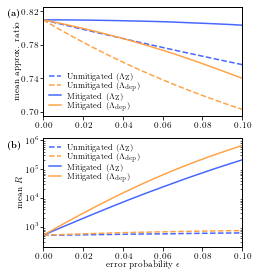

In [5]:
"""Save a figure"""
fig, ax = plotlib.create_fig(single_col=True,nrows=2)

"""First plot"""
ax[0].plot(x,np.mean(approxr_dephasing,axis=0),label=r'Unmitigated ($\Lambda_\text{Z}$)',linestyle='--',color=colors[0])

"""Second plot"""
ax[0].plot(x,np.mean(approxr_depolarizing,axis=0),label=r'Unmitigated ($\Lambda_\text{dep}$)',linestyle='--',color=colors[1])

"""Third plot"""
ax[0].plot(x,np.mean(m_approxr_dephasing,axis=0),label=r'Mitigated ($\Lambda_\text{Z}$)',color=colors[0])

"""Fourth plot"""
ax[0].plot(x,np.mean(m_approxr_depolarizing,axis=0),label=r'Mitigated ($\Lambda_\text{dep}$)',color=colors[1])

"""Labels, Ticks and Legens"""
ax[0].set_yticks([.7,.74,.78,.82])
ax[0].set_ylim([.695,.825])

ax[0].set_ylabel(r'mean approx. ratio');
ax[0].legend(loc="best", frameon=False, framealpha=1, ncol=1, fontsize=8)

ax[0].tick_params(axis="x", direction="out", which='major')
ax[0].tick_params(axis="y", direction="out")
ax[0].tick_params(right=False, top=False)

plotlib.add_label(ax[0],x0=0.18)

"""NEXT FIGURE"""

"""First plot"""
ax[1].semilogy(x,np.mean(var_dephasing,axis=0)/threshold/2,label=r'Unmitigated ($\Lambda_\text{Z}$)',linestyle='--',color=colors[0])

"""Second plot"""
ax[1].semilogy(x,np.mean(var_depolarizing,axis=0)/threshold/2,label=r'Unmitigated ($\Lambda_\text{dep}$)',linestyle='--',color=colors[1])

"""Third plot"""
ax[1].semilogy(x,np.mean(m_var_dephasing,axis=0)/threshold,label=r'Mitigated ($\Lambda_\text{Z}$)',color=colors[0])

"""Fourth plot"""
ax[1].semilogy(x,np.mean(m_var_depolarizing,axis=0)/threshold,label=r'Mitigated ($\Lambda_\text{dep}$)',color=colors[1])

ax[1].set_xlabel(r'error probability $\epsilon$');
ax[1].set_yticks([1e2,1e3,1e4,1e5,1e6])
ax[1].set_ylim([2*1e2,1.2*1e6])
ax[1].set_ylabel(r'mean $R$');
ax[1].legend(loc="best", frameon=False, framealpha=1, ncol=1, fontsize=8)

ax[1].tick_params(axis="x", direction="out", which='major')
ax[1].tick_params(axis="y", direction="out")
ax[1].tick_params(right=False, top=False)
plotlib.add_label(ax[1],x0=0.18,text='(b)')
plt.close()

In [8]:
fig.savefig("../figures/fig-qaoa.pdf",
            bbox_inches='tight',
            pad_inches=0.1)

Look at the expectation value landscape of a single instance

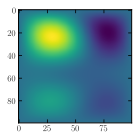

In [10]:
%config InlineBackend.figure_formats = ['svg']
path = "max_cut_"+str(0)+"/"
res_z = pickle.load(open(path + "qaoa_parameters_brute_dephasing","rb"))
plt.imshow(res_z["0"][1][3]);